Провести EDA с упором на пропущенные значения и выбросы
Обучить простую модель несколько раз (см. ниже) и сравнить качество.
При обучении модели постепенно фильтровать выбросы и заполнять пропуски. При фильтрации выбросов и заполнении пропусков при необходимости обосновывать выбранные методы.
Сгенерировать не менее новых 5 признаков (генерация с помощью PolynomialFeatures считать как один признак) и обучить модель после каждого добавления нового признака для контроля качества.
Построить изменения качества график качества модели на каждом шаге (после обработки каждого признака и после каждого добавления нового признака)

Используйте столбцы [‘full_sq’, ‘life_sq’, ‘floor’, ‘max_floor’, ‘material’, ‘build_year’, ‘num_room’, ‘kitch_sq’, ‘state’, ‘area_m’, ‘raion_popul’, ‘green_zone_part’, ‘indust_part’, ‘preschool_education_centers_raion’, ‘school_education_centers_raion’, ‘hospital_beds_raion’, ‘healthcare_centers_raion’, ‘sport_objects_raion’, ‘additional_education_raion’, ‘shopping_centers_raion’, ‘office_raion’, ‘ID_metro’, ‘metro_min_walk’, ‘kindergarten_km’, ‘school_km’, ‘park_km’, ‘green_zone_km’, ‘industrial_km’, ‘water_km’, ‘mkad_km’, ‘ttk_km’, ‘sadovoe_km’, ‘bulvar_ring_km’, ‘kremlin_km’, ‘ts_km’, ‘big_market_km’,‘market_shop_km’, ‘fitness_km’, ‘university_km’, ‘workplaces_km’, ‘shopping_centers_km’, ‘office_km’, ‘additional_education_raion’, ‘preschool_km’, ‘price_doc’]


In [1]:
import numpy as np
import pandas as pd

In [210]:
dataframe = pd.read_csv('train.csv', usecols=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km', 'price_doc'])

In [211]:
dataframe.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,...,4.308127,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,0.177975,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,...,0.725560,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,0.273345,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,...,3.562188,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,0.158072,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,...,0.583025,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,0.236455,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,...,2.609420,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,0.376838,16331452


Посмотрим, где есть пропущенные значения

In [212]:
dataframe.isna().sum()

full_sq                                  0
life_sq                               6383
floor                                  167
max_floor                             9572
material                              9572
build_year                           13605
num_room                              9572
kitch_sq                              9572
state                                13559
area_m                                   0
raion_popul                              0
green_zone_part                          0
indust_part                              0
preschool_education_centers_raion        0
school_education_centers_raion           0
hospital_beds_raion                  14441
healthcare_centers_raion                 0
sport_objects_raion                      0
additional_education_raion               0
shopping_centers_raion                   0
office_raion                             0
ID_metro                                 0
metro_min_walk                          25
kindergarte

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Обучим модель. Пока ничего не изменяя

In [66]:
data = dataframe.dropna(axis = 0, how ='any') 

In [67]:
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [11]:
scaler = StandardScaler()

In [68]:
X = scaler.fit_transform(X)

In [13]:
model = LogisticRegression()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [70]:
model.fit( X_train, y_train )
predictions = model.predict( X_test )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
score1 = model.score(X_test, y_test)
score1

0.024133663366336634

In [72]:
y_pred_lr = model.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred_lr)
mae1 = mean_absolute_error(y_test, y_pred_lr)

In [73]:
print('Среднеквадратичная ошибка: ', mse1)
print('Cредняя абсолютная ошибка: ', mae1)

Среднеквадратичная ошибка:  24076965050041.05
Cредняя абсолютная ошибка:  3028812.8924814356


Посмотрим корреляцию

<AxesSubplot:>

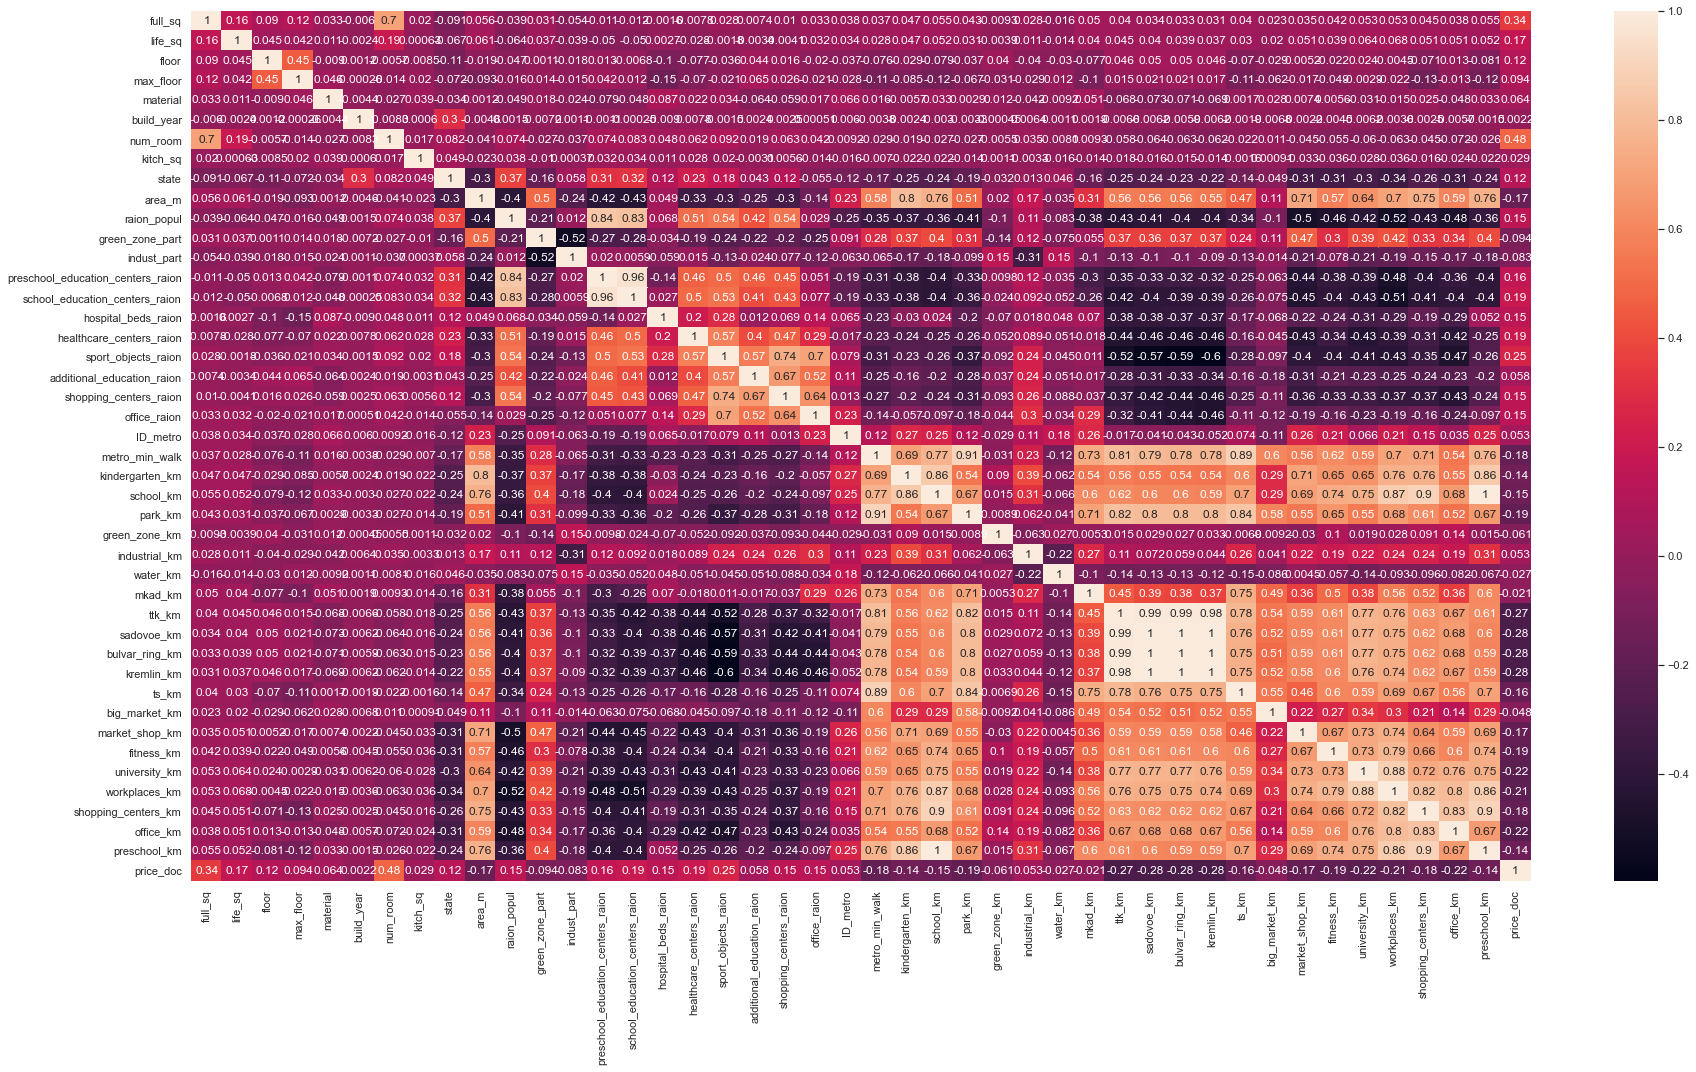

In [74]:
sns.set(rc = {'figure.figsize':(30,16)})
sns.heatmap(dataframe.corr(), annot=True)

Удалим столбцы с корреляцией 1 и больше 0.9

In [213]:
dataframe = dataframe.drop(['preschool_km', 'metro_min_walk', 'kremlin_km', 'sadovoe_km', 'bulvar_ring_km'], axis = 1)

Начинаем заполнять пропущенные значения

In [214]:
dataframe['life_sq'].fillna(dataframe['life_sq'].median(), inplace=True)

Построим боксплот, чтобы найти выбросы

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\CoreI7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

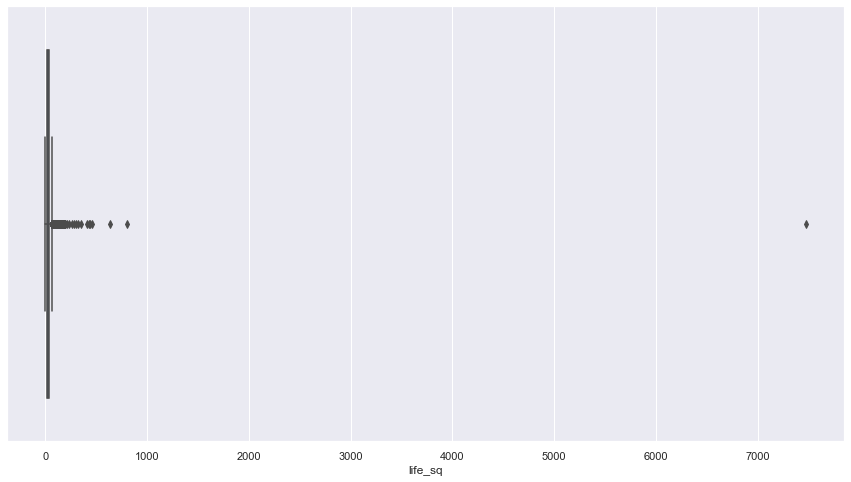

<Figure size 1080x576 with 0 Axes>

In [216]:
sns.boxplot(dataframe['life_sq'])
plt.figure()

Удалим выбросы

In [217]:
dataframe = dataframe.loc[(dataframe['life_sq']<100)]

In [218]:
data = dataframe.dropna(axis = 0, how ='any') 

In [219]:
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [220]:
X = scaler.fit_transform(X)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [222]:
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [223]:
score2 = model.score(X_test, y_test)
score2

0.025111009033838616

In [224]:
y_pred_lr = model.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred_lr)
mae2 = mean_absolute_error(y_test, y_pred_lr)
mse2, mae2

(21942115403254.297, 3074225.6772316643)

In [225]:
dataframe['floor'].fillna(dataframe['floor'].mode()[0], inplace=True)

C:\Users\CoreI7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

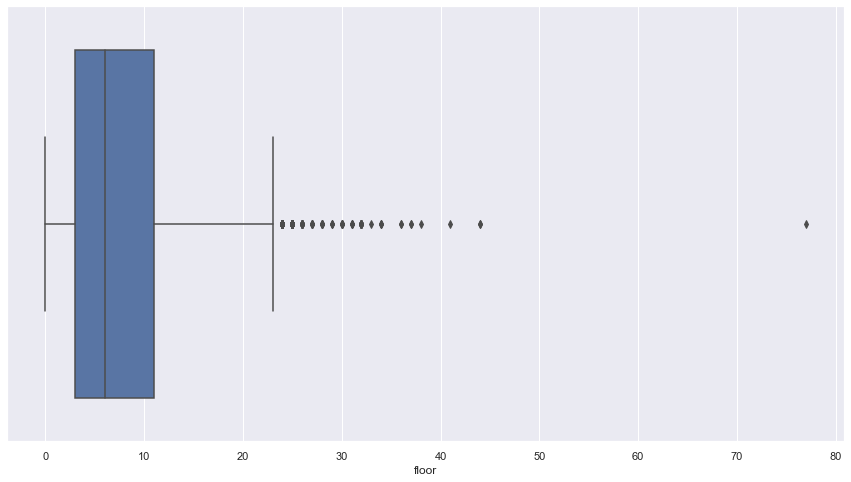

<Figure size 1080x576 with 0 Axes>

In [226]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(dataframe['floor'])
plt.figure()

In [227]:
dataframe = dataframe.loc[(dataframe['floor']<30)]

In [228]:
data = dataframe.dropna(axis = 0, how ='any') 

In [229]:
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [230]:
X = scaler.fit_transform(X)

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [232]:
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
score3 = model.score(X_test, y_test)
score3

0.02439398588524087

In [234]:
y_pred_lr = model.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred_lr)
mae3 = mean_absolute_error(y_test, y_pred_lr)
mse3, mae3

(21837995747696.94, 2942675.015188708)

In [235]:
dataframe['max_floor'].fillna(dataframe['max_floor'].mode()[0], inplace=True)

C:\Users\CoreI7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

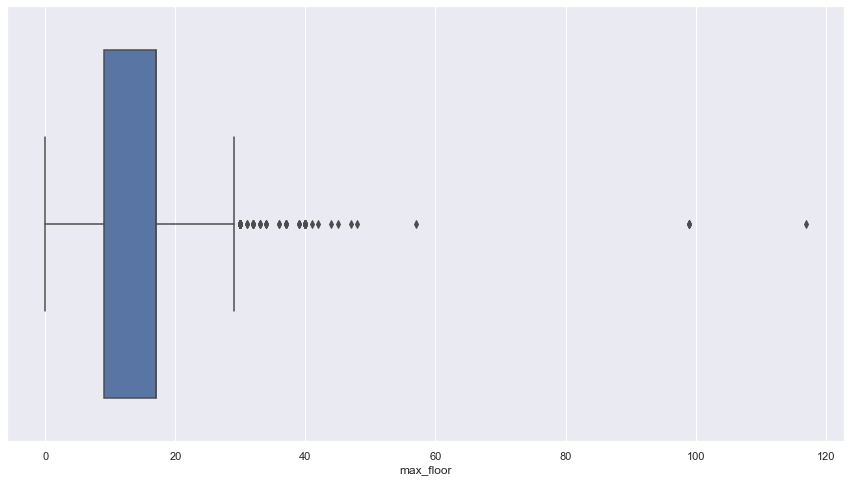

<Figure size 1080x576 with 0 Axes>

In [236]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(dataframe['max_floor'])
plt.figure()

In [237]:
dataframe = dataframe.loc[(dataframe['max_floor']<30)]

In [238]:
data = dataframe.dropna(axis = 0, how ='any') 

In [239]:
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [240]:
X = scaler.fit_transform(X)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [242]:
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [243]:
score4 = model.score(X_test, y_test)
score4

0.02396042665017777

In [244]:
y_pred_lr = model.predict(X_test)
mse4 = mean_squared_error(y_test, y_pred_lr)
mae4 = mean_absolute_error(y_test, y_pred_lr)
mse4, mae4

(21676062489890.914, 3050562.1244396353)

In [245]:
dataframe['material'].fillna(dataframe['material'].mode()[0], inplace=True)

C:\Users\CoreI7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

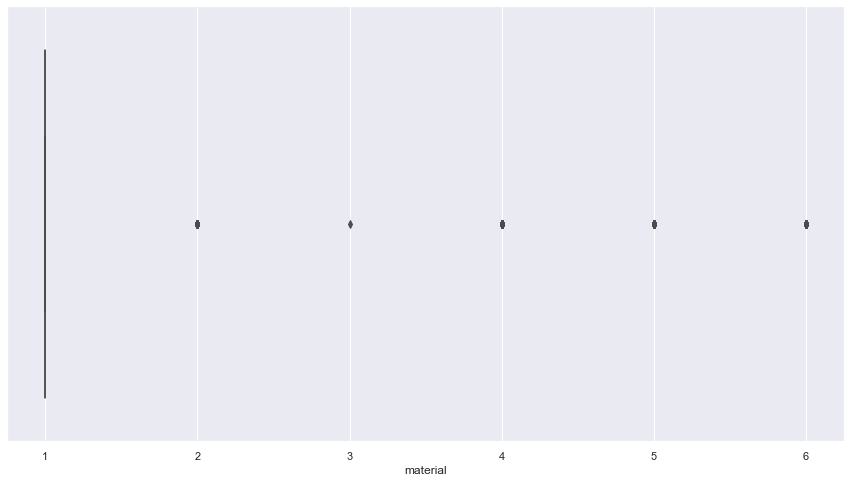

<Figure size 1080x576 with 0 Axes>

In [246]:
sns.boxplot(dataframe['material'])
plt.figure()

In [247]:
data = dataframe.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [248]:
X = scaler.fit_transform(X)

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [250]:
score5 = model.score(X_test, y_test)
score5

0.02396042665017777

In [251]:
y_pred_lr = model.predict(X_test)
mse5 = mean_squared_error(y_test, y_pred_lr)
mae5 = mean_absolute_error(y_test, y_pred_lr)
mse5, mae5

(21676062489890.914, 3050562.1244396353)

In [252]:
dataframe['build_year'].fillna(dataframe['build_year'].median(), inplace=True)

C:\Users\CoreI7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

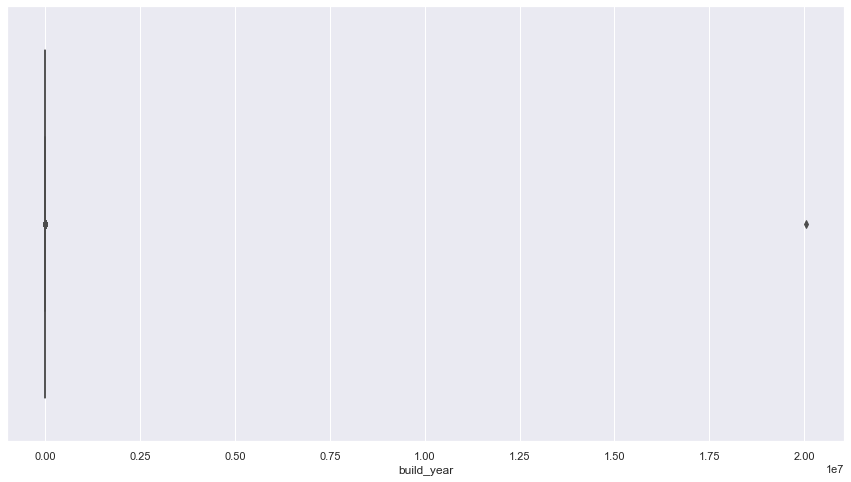

<Figure size 1080x576 with 0 Axes>

In [253]:
sns.boxplot(dataframe['build_year'])
plt.figure()

In [254]:
data = dataframe.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [255]:
X = scaler.fit_transform(X)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [257]:
score6 = model.score(X_test, y_test)
score6

0.028299203640500568

In [258]:
y_pred_lr = model.predict(X_test)
mse6 = mean_squared_error(y_test, y_pred_lr)
mae6 = mean_absolute_error(y_test, y_pred_lr)
mse6, mae6

(19632013280010.113, 2888187.156712173)

In [259]:
dataframe['num_room'].fillna(dataframe['num_room'].mode()[0], inplace=True)

C:\Users\CoreI7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

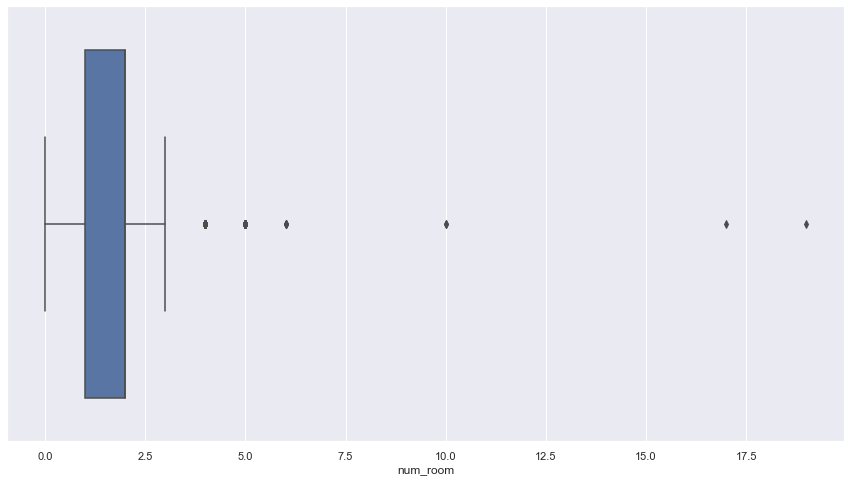

<Figure size 1080x576 with 0 Axes>

In [260]:
sns.boxplot(dataframe['num_room'])
plt.figure()

In [261]:
dataframe = dataframe.loc[(dataframe['num_room']<10)]

In [262]:
data = dataframe.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [263]:
X = scaler.fit_transform(X)

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [265]:
score7 = model.score(X_test, y_test)
score7

0.03129000142227279

In [266]:
y_pred_lr = model.predict(X_test)
mse7 = mean_squared_error(y_test, y_pred_lr)
mae7 = mean_absolute_error(y_test, y_pred_lr)
mse7, mae7

(19701741299793.855, 2847267.9679988623)

In [267]:
dataframe['kitch_sq'].fillna(dataframe['kitch_sq'].mode()[0], inplace=True)

C:\Users\CoreI7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

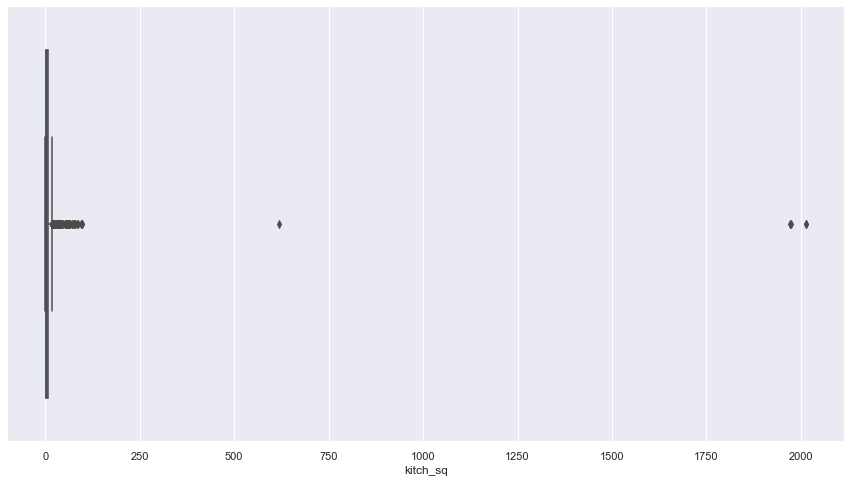

<Figure size 1080x576 with 0 Axes>

In [268]:
sns.boxplot(dataframe['kitch_sq'])
plt.figure()

In [269]:
dataframe = dataframe.loc[(dataframe['kitch_sq']<30)]

In [270]:
data = dataframe.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [271]:
X = scaler.fit_transform(X)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [273]:
score8 = model.score(X_test, y_test)
score8

0.024084366538406725

In [274]:
y_pred_lr = model.predict(X_test)
mse8 = mean_squared_error(y_test, y_pred_lr)
mae8 = mean_absolute_error(y_test, y_pred_lr)
mse8, mae8

(18084714059986.383, 2704503.667379222)

In [275]:
dataframe['state'].fillna(dataframe['state'].mode()[0], inplace=True)

C:\Users\CoreI7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

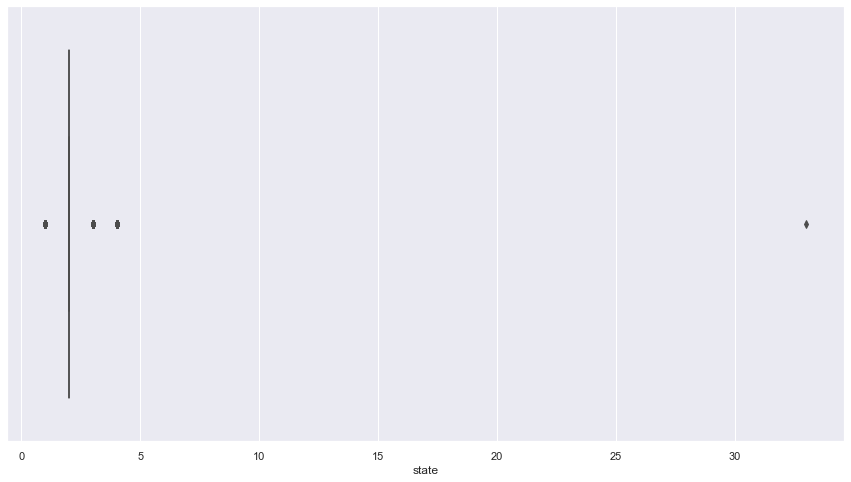

<Figure size 1080x576 with 0 Axes>

In [276]:
sns.boxplot(dataframe['state'])
plt.figure()

In [277]:
dataframe = dataframe.loc[(dataframe['state']<10)]

In [278]:
data = dataframe.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [279]:
X = scaler.fit_transform(X)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [281]:
score9 = model.score(X_test, y_test)
score9

0.030026220079506047

In [282]:
y_pred_lr = model.predict(X_test)
mse9 = mean_squared_error(y_test, y_pred_lr)
mae9 = mean_absolute_error(y_test, y_pred_lr)
mse9, mae9

(22277273202645.945, 2969563.964645183)

In [283]:
dataframe['hospital_beds_raion'].fillna(dataframe['hospital_beds_raion'].median(), inplace=True)

C:\Users\CoreI7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

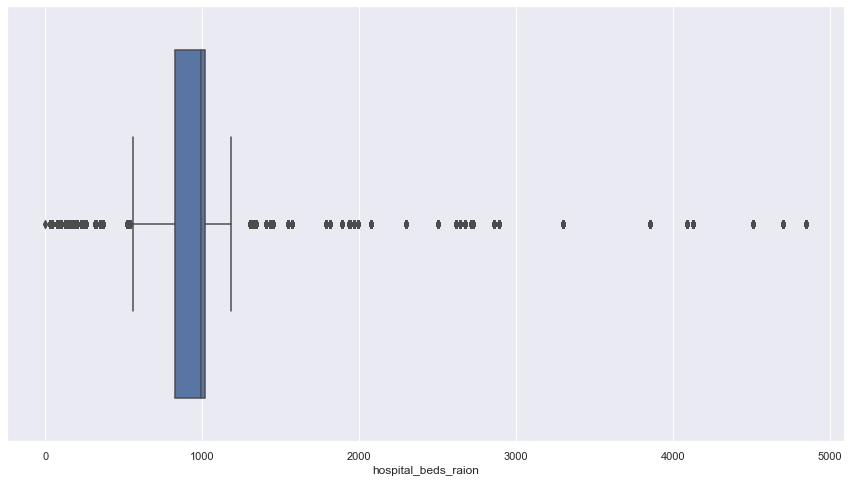

<Figure size 1080x576 with 0 Axes>

In [284]:
sns.boxplot(dataframe['hospital_beds_raion'])
plt.figure()

In [285]:
dataframe = dataframe.loc[(dataframe['hospital_beds_raion']<1500)]

In [286]:
data = dataframe.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [287]:
X = scaler.fit_transform(X)

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [291]:
score10 = model.score(X_test, y_test)
score10

0.027571525001298093

In [292]:
y_pred_lr = model.predict(X_test)
mse10 = mean_squared_error(y_test, y_pred_lr)
mae10 = mean_absolute_error(y_test, y_pred_lr)
mse10, mae10

(13691351940564.617, 2286014.9792824136)

df = dataframe[]

In [301]:
df = dataframe[['full_sq', 'life_sq', 'kitch_sq', 'area_m', 'raion_popul', 'ttk_km', 'ts_km',
               'fitness_km', 'university_km','shopping_centers_km', 'office_km', 'price_doc']]

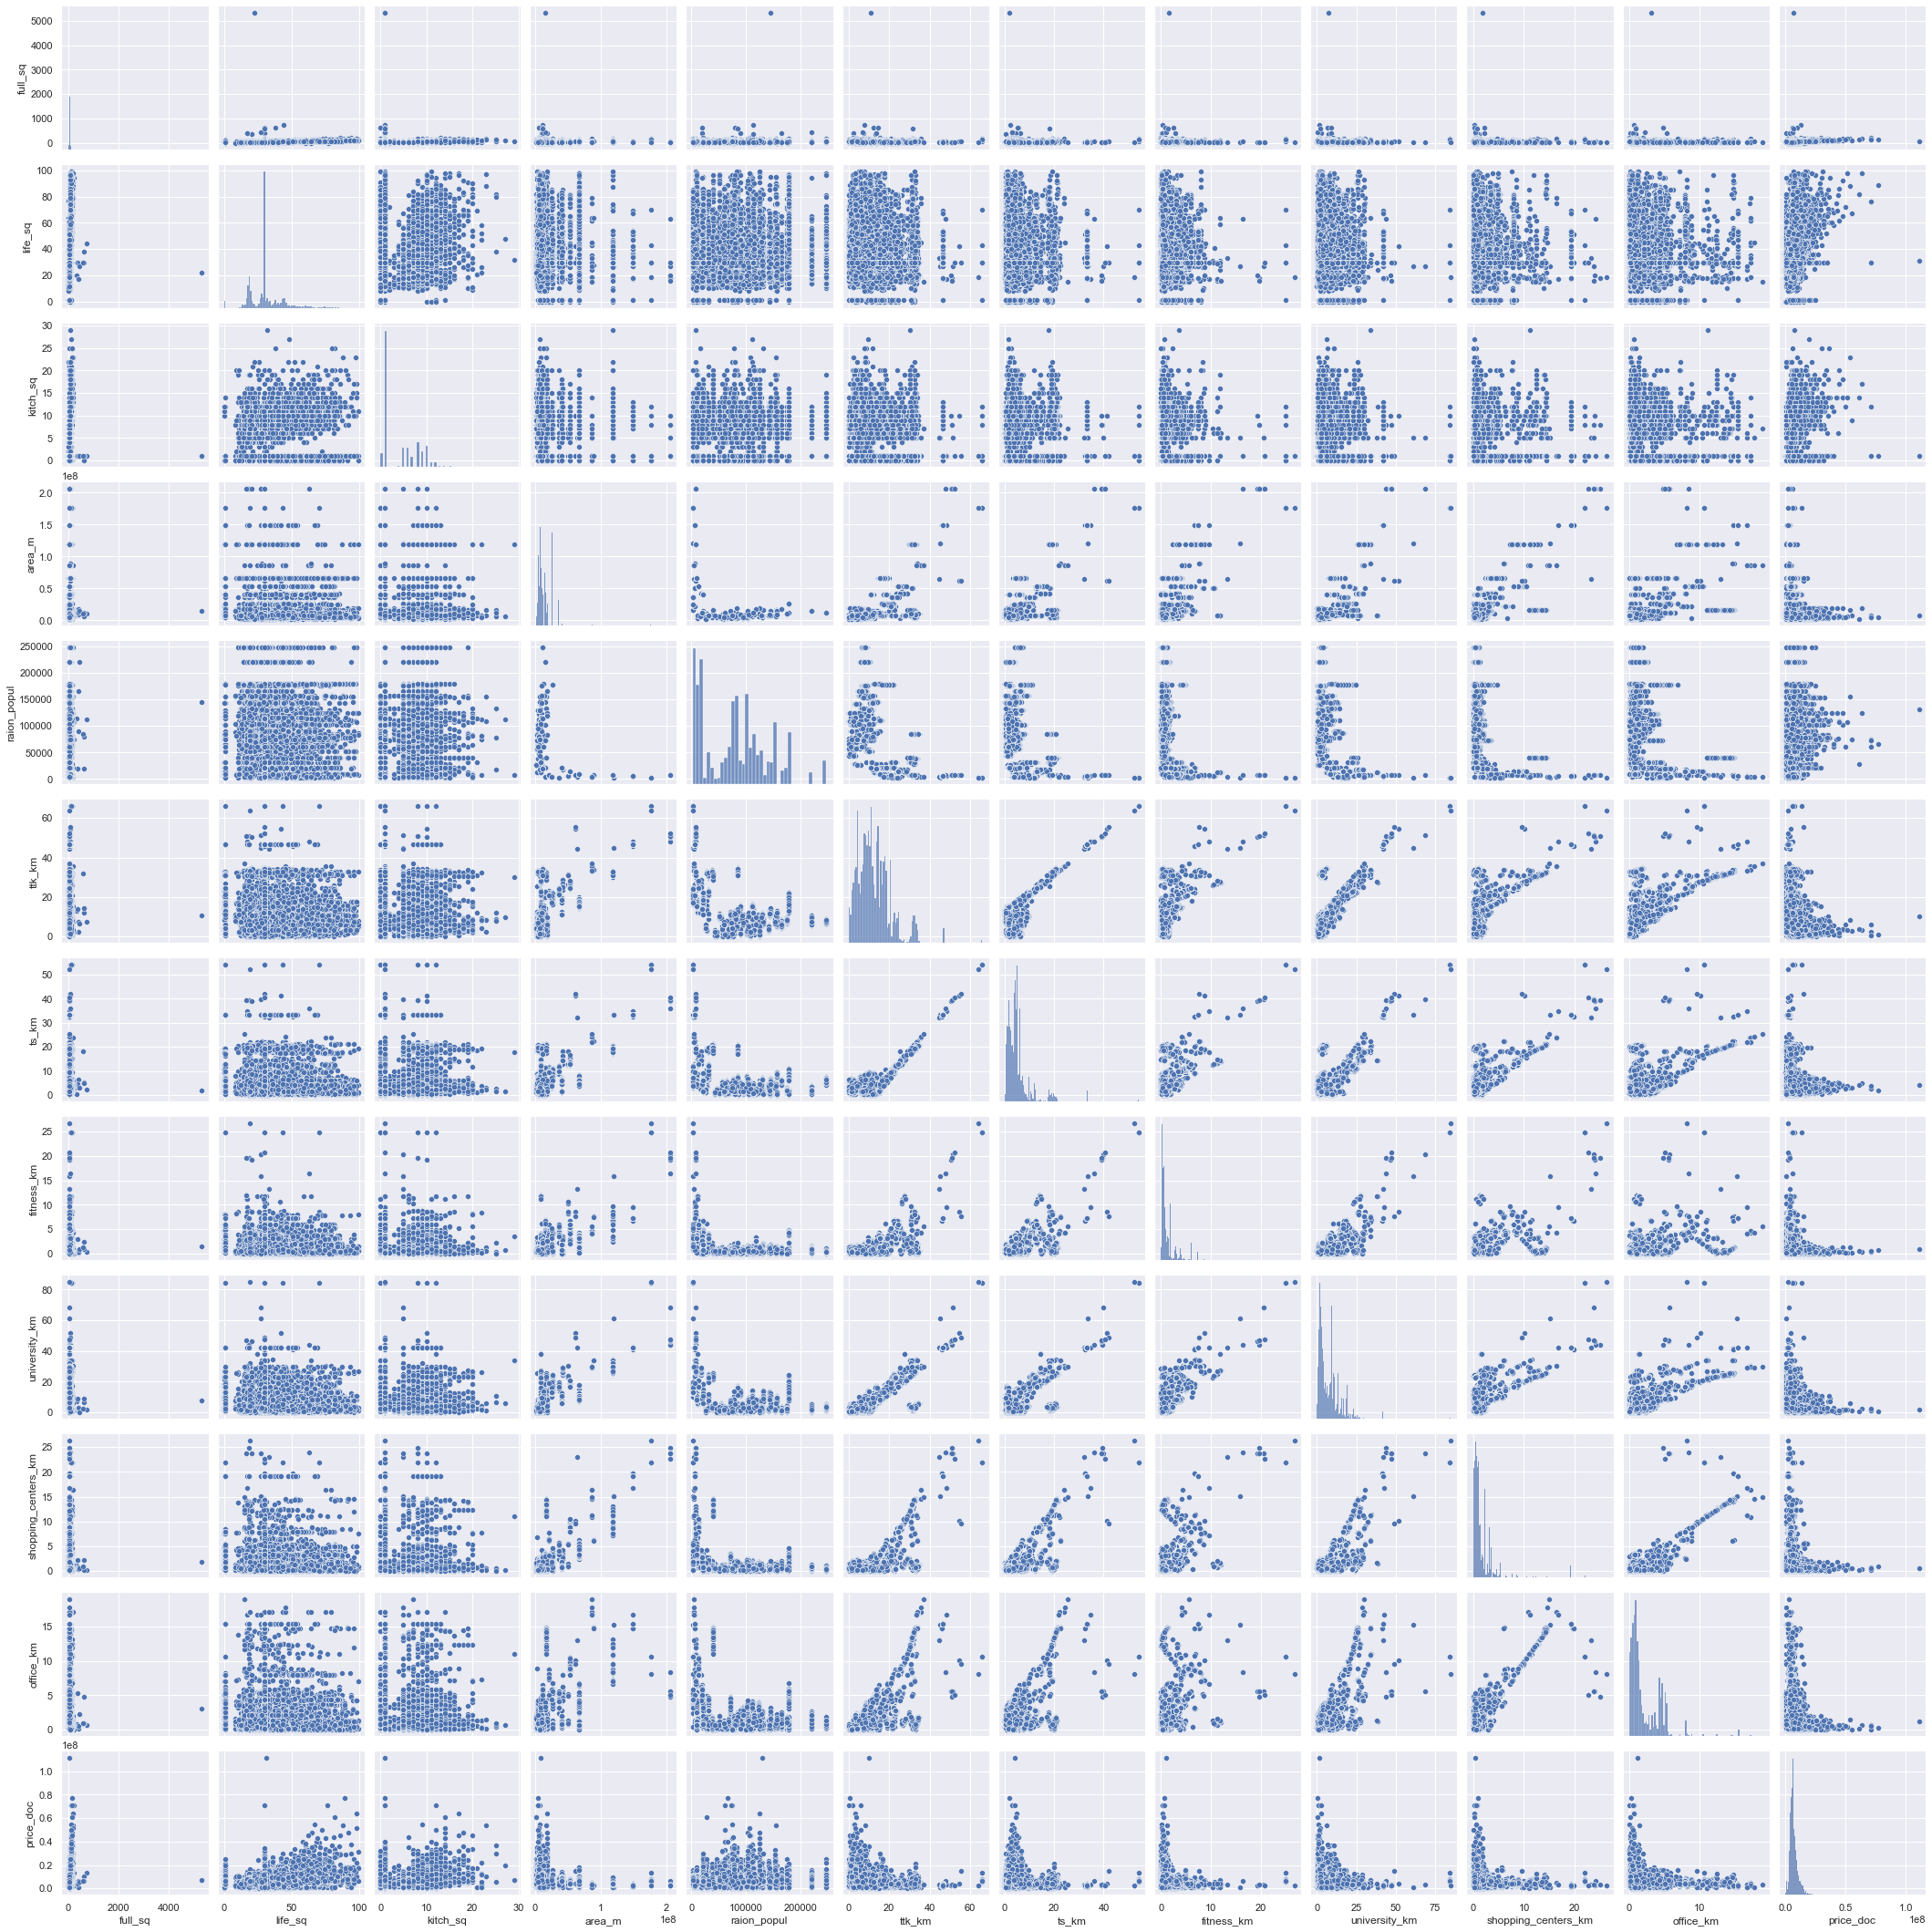

In [302]:
sns.pairplot(df)

<AxesSubplot:>

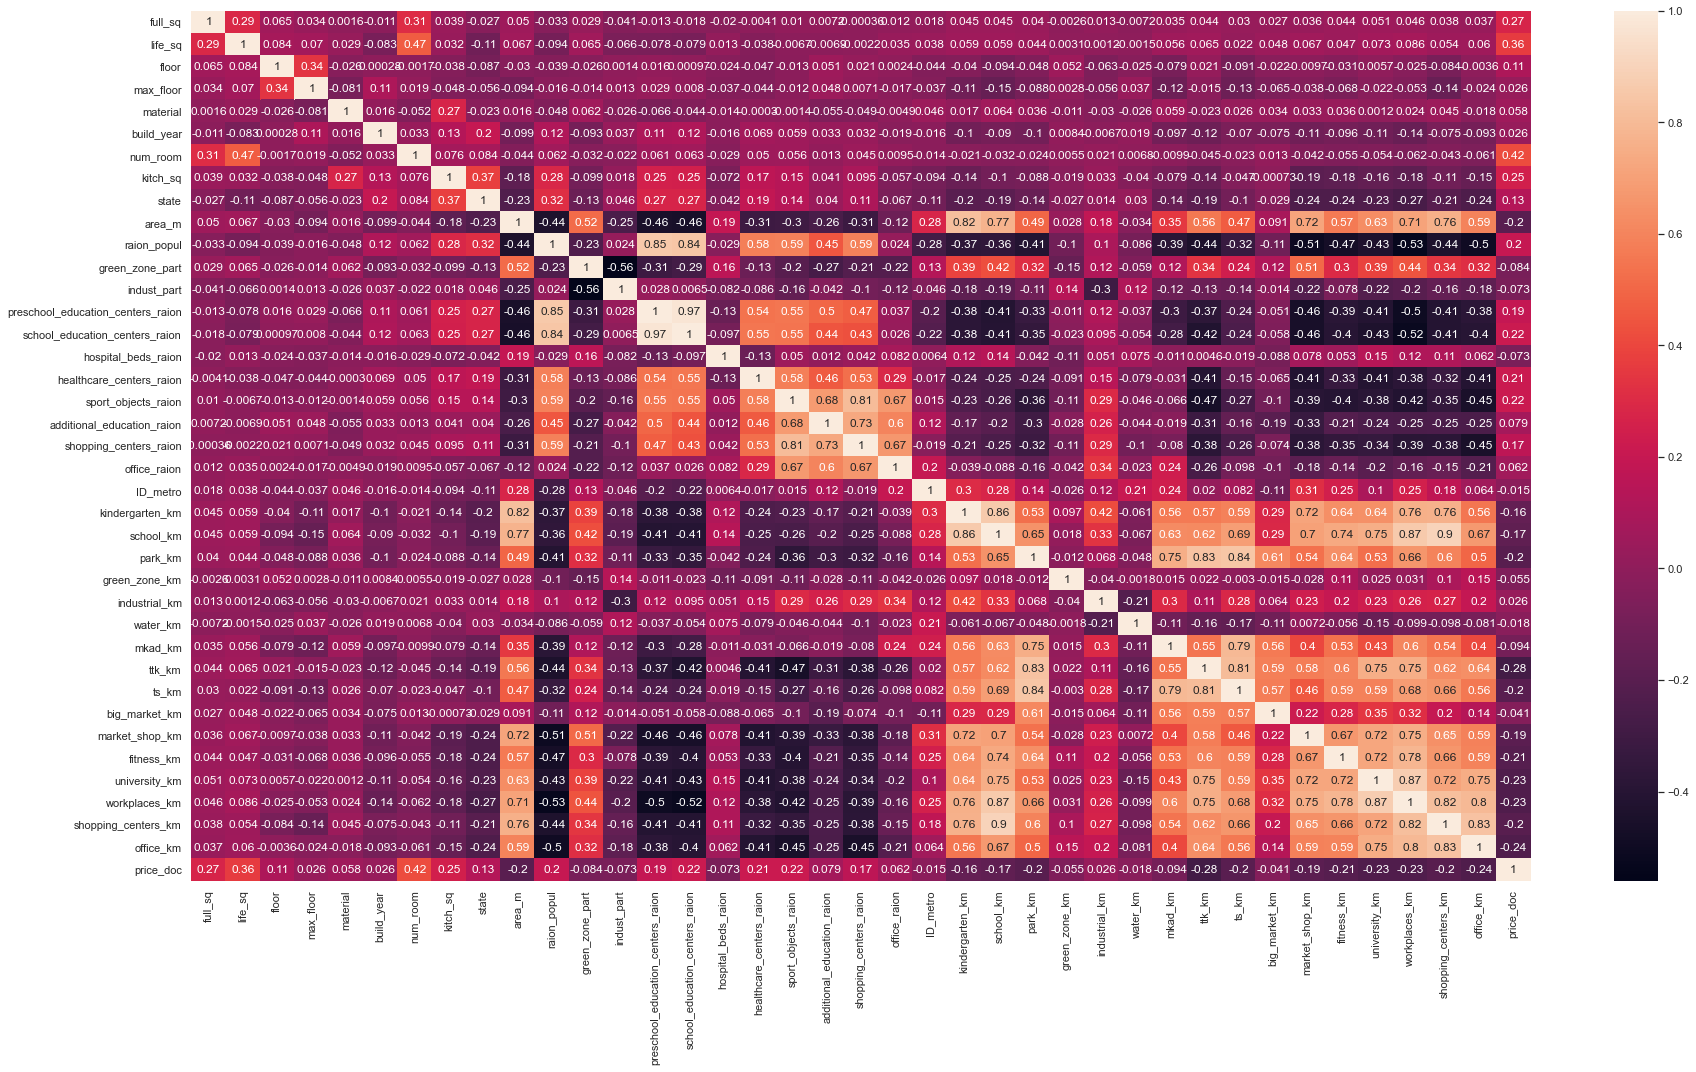

In [296]:
sns.set(rc = {'figure.figsize':(30,16)})
sns.heatmap(dataframe.corr(), annot=True)

Удалим сильнокоррелирующие значения

In [299]:
dataframe = dataframe.drop(['preschool_education_centers_raion', 'school_km', 'workplaces_km'], axis = 1)

In [333]:
dataframe.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,shopping_centers_km,office_km,price_doc,ttk_km_new,full_sq_life_sq
0,43,27.0,4.0,17.0,1.0,1979.0,2.0,1.0,2.0,6.407578e+06,...,4.308127,10.814172,1.676258,0.485841,6.715026,0.648488,0.637189,5850000,0.091587,16.0
1,34,19.0,3.0,17.0,1.0,1979.0,2.0,1.0,2.0,9.589337e+06,...,0.725560,6.910568,3.424716,0.668364,1.852560,0.519311,0.688796,6000000,0.322165,15.0
2,43,29.0,2.0,17.0,1.0,1979.0,2.0,1.0,2.0,4.808270e+06,...,3.562188,5.752368,1.375443,0.733101,0.841254,1.486533,1.543049,5700000,0.341590,14.0
3,89,50.0,9.0,17.0,1.0,1979.0,2.0,1.0,2.0,1.258354e+07,...,0.583025,27.892717,0.811275,0.623484,10.903161,0.599914,0.934273,13100000,0.068463,39.0
4,77,77.0,4.0,17.0,1.0,1979.0,2.0,1.0,2.0,8.398461e+06,...,2.609420,9.155057,1.969738,0.220288,0.991683,0.429052,0.077901,16331452,0.580776,0.0


Сгенерируем новый признак. Из графика видно, что price_doc зависит 1/ttk_km_new

In [303]:
dataframe['ttk_km_new'] = 1/dataframe['ttk_km']

In [305]:
data = dataframe.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [306]:
X = scaler.fit_transform(X)

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [308]:
score11 = model.score(X_test, y_test)
score11

0.028402305415649826

In [309]:
y_pred_lr = model.predict(X_test)
mse11 = mean_squared_error(y_test, y_pred_lr)
mae11 = mean_absolute_error(y_test, y_pred_lr)
mse11, mae11

(13857625328250.797, 2303752.760891012)

Сгенерируем новый признак full_sq - life_sq

In [334]:
dataframe['full_sq_life_sq'] = (dataframe['full_sq'] - dataframe['life_sq'])**2

In [335]:
data = dataframe.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [336]:
X = scaler.fit_transform(X)

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [338]:
score12 = model.score(X_test, y_test)
score12

0.028090762760267927

In [339]:
y_pred_lr = model.predict(X_test)
mse12 = mean_squared_error(y_test, y_pred_lr)
mae12 = mean_absolute_error(y_test, y_pred_lr)
mse12, mae12

(13906095270100.215, 2306193.0624643024)

Попробуем оставить пять самых важных признаков

In [353]:
df = dataframe[['full_sq', 'life_sq', 'num_room', 'kitch_sq', 'ttk_km', 'price_doc']]

In [354]:
data = df.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [355]:
X = scaler.fit_transform(X)

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [357]:
score13 = model.score(X_test, y_test)
score13

0.02544265018952178

In [358]:
y_pred_lr = model.predict(X_test)
mse13 = mean_squared_error(y_test, y_pred_lr)
mae13 = mean_absolute_error(y_test, y_pred_lr)
mse13, mae13

(25281289802738.49, 3907247.099382107)

Сгенерируем новый признак

In [359]:
dataframe['office_km_new'] = 1/(dataframe['office_km']+1)

In [360]:
data = dataframe.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [361]:
X = scaler.fit_transform(X)

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [363]:
score14 = model.score(X_test, y_test)
score14

0.028194610312061892

In [364]:
y_pred_lr = model.predict(X_test)
mse14 = mean_squared_error(y_test, y_pred_lr)
mae14 = mean_absolute_error(y_test, y_pred_lr)
mse14, mae14

(13722143132936.162, 2283477.6995690325)

Создадим ещё признаки

In [365]:
dataframe['shopping_centers_km_new'] = 1/(dataframe['shopping_centers_km']+1)
dataframe['university_km_new'] = 1/(dataframe['university_km']+1)
dataframe['fitness_km_new'] = 1/(dataframe['fitness_km']+1)

In [366]:
data = dataframe.dropna(axis = 0, how ='any') 
X = data.loc[:, data.columns != 'price_doc']
y = data.loc[:, data.columns == 'price_doc']

In [367]:
X = scaler.fit_transform(X)

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
model.fit( X_train, y_train )

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [369]:
score15 = model.score(X_test, y_test)
score15

0.027934991432576977

In [370]:
y_pred_lr = model.predict(X_test)
mse15 = mean_squared_error(y_test, y_pred_lr)
mae15 = mean_absolute_error(y_test, y_pred_lr)
mse15, mae15

(13561885525573.637, 2250674.02736383)

In [371]:
import matplotlib.pyplot as plt

In [372]:
mae = (mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9, mae10, mae11, mae12, mae13, mae14, mae15,)

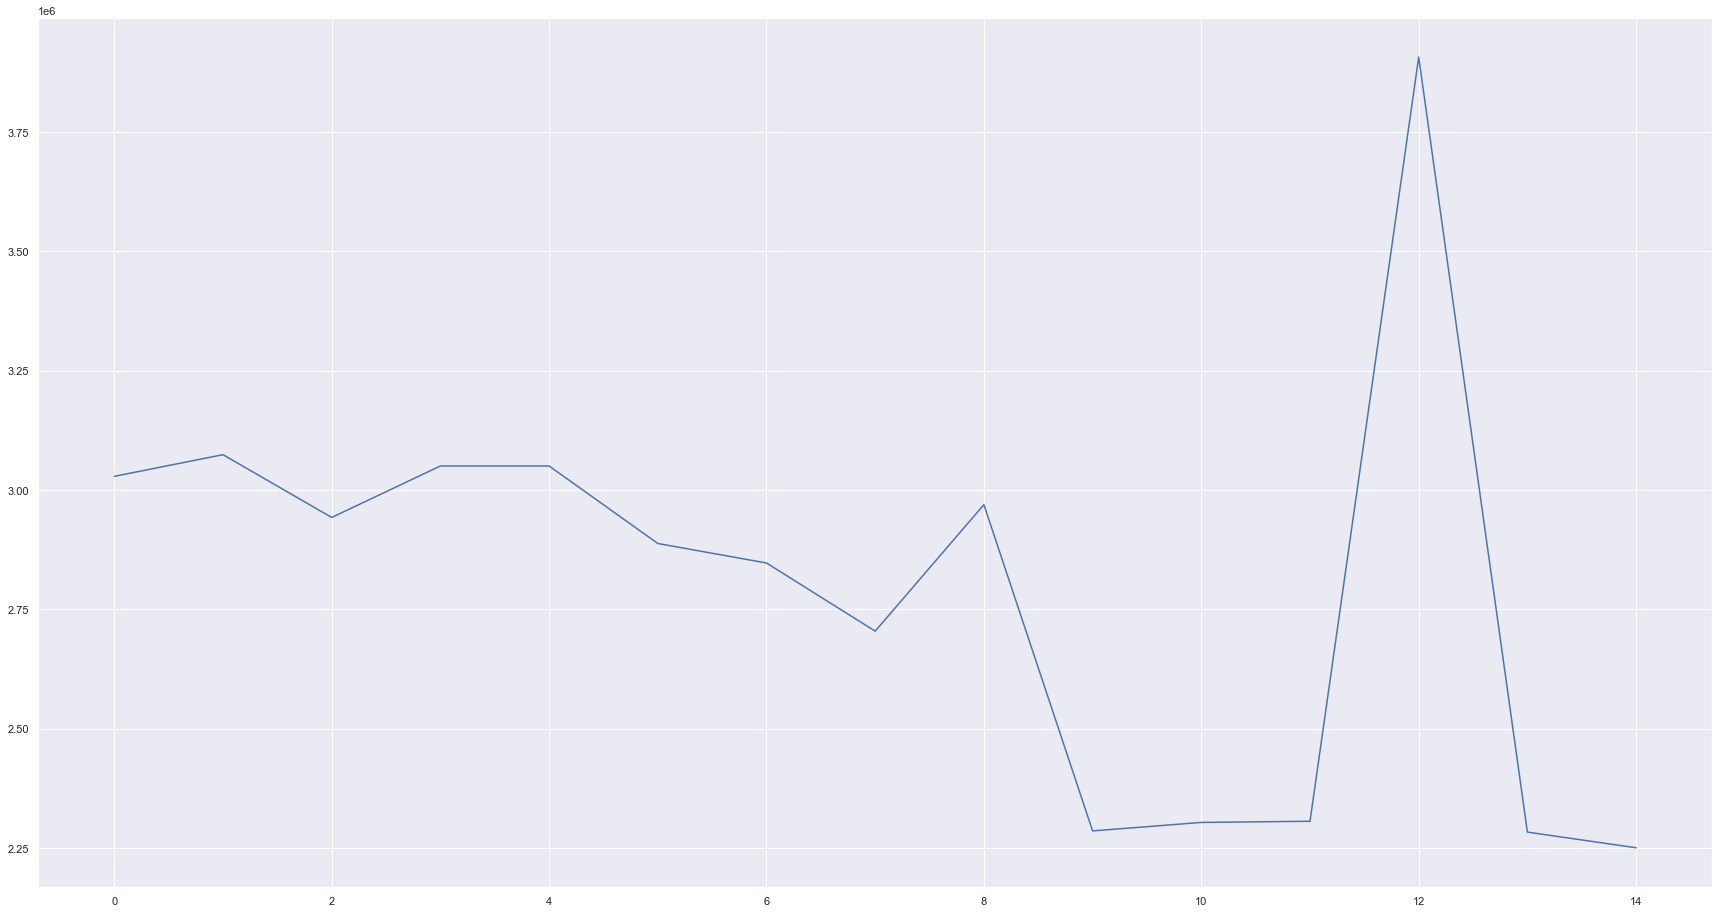

In [375]:
plt.plot(mae)